In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
# %pip install h5py graphviz pydot


In [2]:
data = pd.read_csv('Lung_Cancer_Dataset.csv')
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [3]:
df = data.copy()
ds = data.copy()
# ds.info()

In [9]:
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace('YES', 1)
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace('NO', 0)
df['LUNG_CANCER'] = df['LUNG_CANCER'].astype(int)
# df['GENDER'] = df['GENDER'].replace('M', 1)
# df['GENDER'] = df['GENDER'].replace('F', 0)
# df['GENDER'] = df['GENDER'].astype(int)


<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

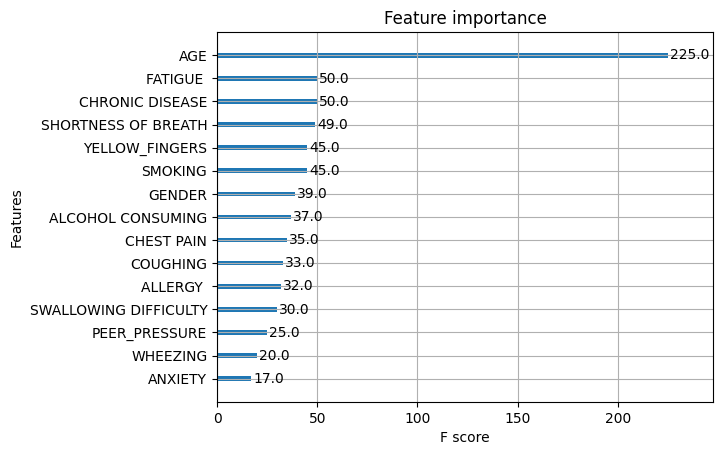

In [10]:
x = ds.drop('LUNG_CANCER',axis=1)
y = df.LUNG_CANCER
#using XGBOOST to find feature importance
import xgboost as xgb
model = xgb.XGBClassifier()
model.fit(x,y)

# first feature importance scores
xgb.plot_importance(model)

In [18]:
ds.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


In [27]:
ds = ds.rename(columns={'FATIGUE ': 'FATIGUE', 
                        'ALLERGY ': 'ALLERGY'})


In [28]:
# Feature selection
selected_columns = ['AGE', 'FATIGUE', 'CHRONIC DISEASE', 'SHORTNESS OF BREATH', 'YELLOW_FINGERS', 
                    'SMOKING', 'GENDER', 'ALCOHOL CONSUMING', 'CHEST PAIN', 'COUGHING', 
                    'ALLERGY', 'SWALLOWING DIFFICULTY', 'ANXIETY']

new_ds = ds[selected_columns]
new_ds.head()


,AGE,FATIGUE,CHRONIC DISEASE,SHORTNESS OF BREATH,YELLOW_FINGERS,SMOKING,GENDER,ALCOHOL CONSUMING,CHEST PAIN,COUGHING,ALLERGY,SWALLOWING DIFFICULTY,ANXIETY
0,69,2,1,2,2,1,1,2,2,2,1,2,2
1,74,2,2,2,1,2,1,1,2,1,2,2,1
2,59,2,1,2,1,1,0,1,2,2,1,1,1
3,63,1,1,1,2,2,1,2,2,1,1,2,2
4,63,1,1,2,2,1,0,1,1,2,1,1,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


x_train, x_test, y_train, y_test = train_test_split(new_ds, y, test_size = 0.10, random_state = 47, stratify = y)
print(f'x_train: {x_train.shape}')
print(f'x_test: {x_test.shape}')
print('y_train: {}'.format(y_train.shape))
print('y_test: {}'.format(y_test.shape))

x_train: (278, 13)
x_test: (31, 13)
y_train: (278,)
y_test: (31,)


In [30]:
# DEEPE LEARNING MODEL

model = tf.keras.Sequential([ #........................ Instantiate the model creating class.
    tf.keras.layers.Dense(units=12, activation='relu'), #... Input layer of 12 features
    tf.keras.layers.Dense(20, activation='relu'), #.... Add the second 20 layer, and instantiate the activation to be used.
    tf.keras.layers.Dense(40, activation='relu'), #..... Add the third layer.
    tf.keras.layers.Dense(20, activation='relu'), #..... Add the third layer.
    tf.keras.layers.Dense(40, activation='relu'), #..... Add the third layer.
    tf.keras.layers.Dense(1, activation='sigmoid') #... Add the last output layer
])
model.compile(optimizer='adam', # ..................... The optimizer that adjusts weight and bias for a given neuron
              loss = 'binary_crossentropy', #...... Loss calculates the error of the prediction
              metrics=['accuracy']) #.................. Accuracy calculates the precision of the prediction.

model.fit(x_train, y_train, epochs=25) #..... Fit the model on the dataset and define the number of epochs



Epoch 1/25


9/9 [==============================] - 15s 20ms/step - loss: 0.5076 - accuracy: 0.7770
Epoch 2/25
9/9 [==============================] - 0s 6ms/step - loss: 0.3816 - accuracy: 0.8741
Epoch 3/25
9/9 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8741
Epoch 4/25
9/9 [==============================] - 0s 8ms/step - loss: 0.3783 - accuracy: 0.8741
Epoch 5/25
9/9 [==============================] - 0s 4ms/step - loss: 0.3770 - accuracy: 0.8741
Epoch 6/25
9/9 [==============================] - 0s 6ms/step - loss: 0.3778 - accuracy: 0.8741
Epoch 7/25
9/9 [==============================] - 0s 4ms/step - loss: 0.3768 - accuracy: 0.8741
Epoch 8/25
9/9 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8741
Epoch 9/25
9/9 [==============================] - 0s 7ms/step - loss: 0.3742 - accuracy: 0.8741
Epoch 10/25
9/9 [==============================] - 0s 5ms/step - loss: 0.3784 - accuracy: 0.8741
Epoch 11/25
9/9 [================

In [31]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  #............................................... set a 50% confidence level that the customer doesnt stop buying
outcome = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
outcome

1/1 [==============================] - 0s 453ms/step


,Actual,Predicted
223,1,1
143,1,1
96,1,1
107,1,1
255,1,1
195,1,1
253,1,1
33,1,1
289,1,1
90,1,1


c:\Users\SAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\SAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(resu

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93        31

    accuracy                           0.87        31
   macro avg       0.50      0.44      0.47        31
weighted avg       1.00      0.87      0.93        31



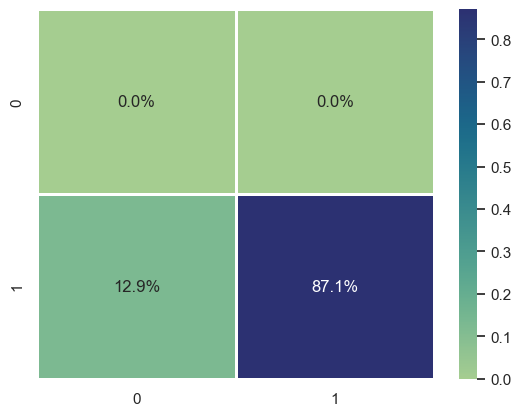

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

revealer = confusion_matrix(y_pred, y_test)
sns.set(style = 'darkgrid')
sns.heatmap(revealer/np.sum(revealer), annot=True, cmap='crest', fmt='.1%', linewidth=1)

print(classification_report(y_pred, y_test))

In [34]:
model.save('cavistalungcancerspred.h5')

c:\Users\SAM\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
